## Import data:

In [12]:
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.filters.morningstar import Q500US
from quantopian.pipeline.factors import CustomFactor, Returns
from quantopian.pipeline.classifiers.morningstar import Sector

In [13]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline

In [14]:
import numpy as np

In [15]:
import alphalens
import alphalens.performance as perf 
import alphalens.utils as utils

## Get Morningstar sector codes:

In [16]:
MORNINGSTAR_SECTOR_CODES = {
     -1: 'Misc',
    101: 'Basic Materials',
    102: 'Consumer Cyclical',
    103: 'Financial Services',
    104: 'Real Estate',
    205: 'Consumer Defensive',
    206: 'Healthcare',
    207: 'Utilities',
    308: 'Communication Services',
    309: 'Energy',
    310: 'Industrials',
    311: 'Technology' ,    
}

## Define the Price Reversal factor:

In [24]:
class PriceReversal(CustomFactor):  
    inputs = [USEquityPricing.close]
    window_length = 20
    
    def compute(self, today, assets, out, close):  
        out[:] = -1 * ((close[0]-close[-19]) / close[-19])

## Define the stock universe:

In [25]:
universe = Q500US()

## Create the Price Reversal Pipeline:

In [26]:
pipe_price_rev = Pipeline(
    columns={
        'PriceReversal': PriceReversal(mask=universe),
        'Sector': Sector(mask=universe),
    },
    screen=universe
)

## Run the Price Reversal Pipeline:

In [27]:
start = '2016-08-11'
end = '2017-08-11'

In [28]:
alphas = run_pipeline(pipe_price_rev, start_date=start, end_date=end)

In [29]:
assets = alphas.index.levels[1].unique()  
pricing = get_pricing(assets, start, end, fields='open_price') 

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.394752,0.012161,-0.019436,0.020013,24300,20.072360
2,-0.039399,0.018416,-0.004610,0.006083,24169,19.964151
3,-0.031065,0.023632,0.000528,0.005581,24179,19.972411
4,-0.023209,0.043015,0.005602,0.006282,24156,19.953412
5,-0.015905,0.424806,0.019022,0.017358,24258,20.037667


Returns Analysis


,1,5,10
Ann. alpha,-0.076,-0.012,-0.014
beta,-0.100,-0.083,-0.005
Mean Period Wise Return Top Quantile (bps),-4.243,-7.578,-11.884
Mean Period Wise Return Bottom Quantile (bps),3.923,4.431,-0.721
Mean Period Wise Spread (bps),-8.165,-2.373,-1.093


/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:727: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:727: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,min_periods=1,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/usr/local/lib/python2.7/dist-packages/alphalens/pl

Information Analysis


,1,5,10
IC Mean,-0.011,-0.006,-0.009
IC Std.,0.144,0.138,0.118
t-stat(IC),-1.227,-0.669,-1.137
p-value(IC),0.221,0.504,0.256
IC Skew,-0.105,-0.176,0.044
IC Kurtosis,-0.007,-0.171,-0.060
Ann. IR,-1.249,-0.681,-1.158


/usr/local/lib/python2.7/dist-packages/alphalens/plotting.py:215: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=22,center=False).mean()
  pd.rolling_mean(ic, 22).plot(ax=a,


Turnover Analysis


,1,5,10
Quantile 1 Mean Turnover,0.760,0.759,0.760
Quantile 2 Mean Turnover,0.793,0.793,0.795
Quantile 3 Mean Turnover,0.769,0.772,0.775
Quantile 4 Mean Turnover,0.789,0.790,0.792
Quantile 5 Mean Turnover,0.772,0.782,0.778


,1,5,10
Mean Factor Rank Autocorrelation,-0.021,0.003,-0.002


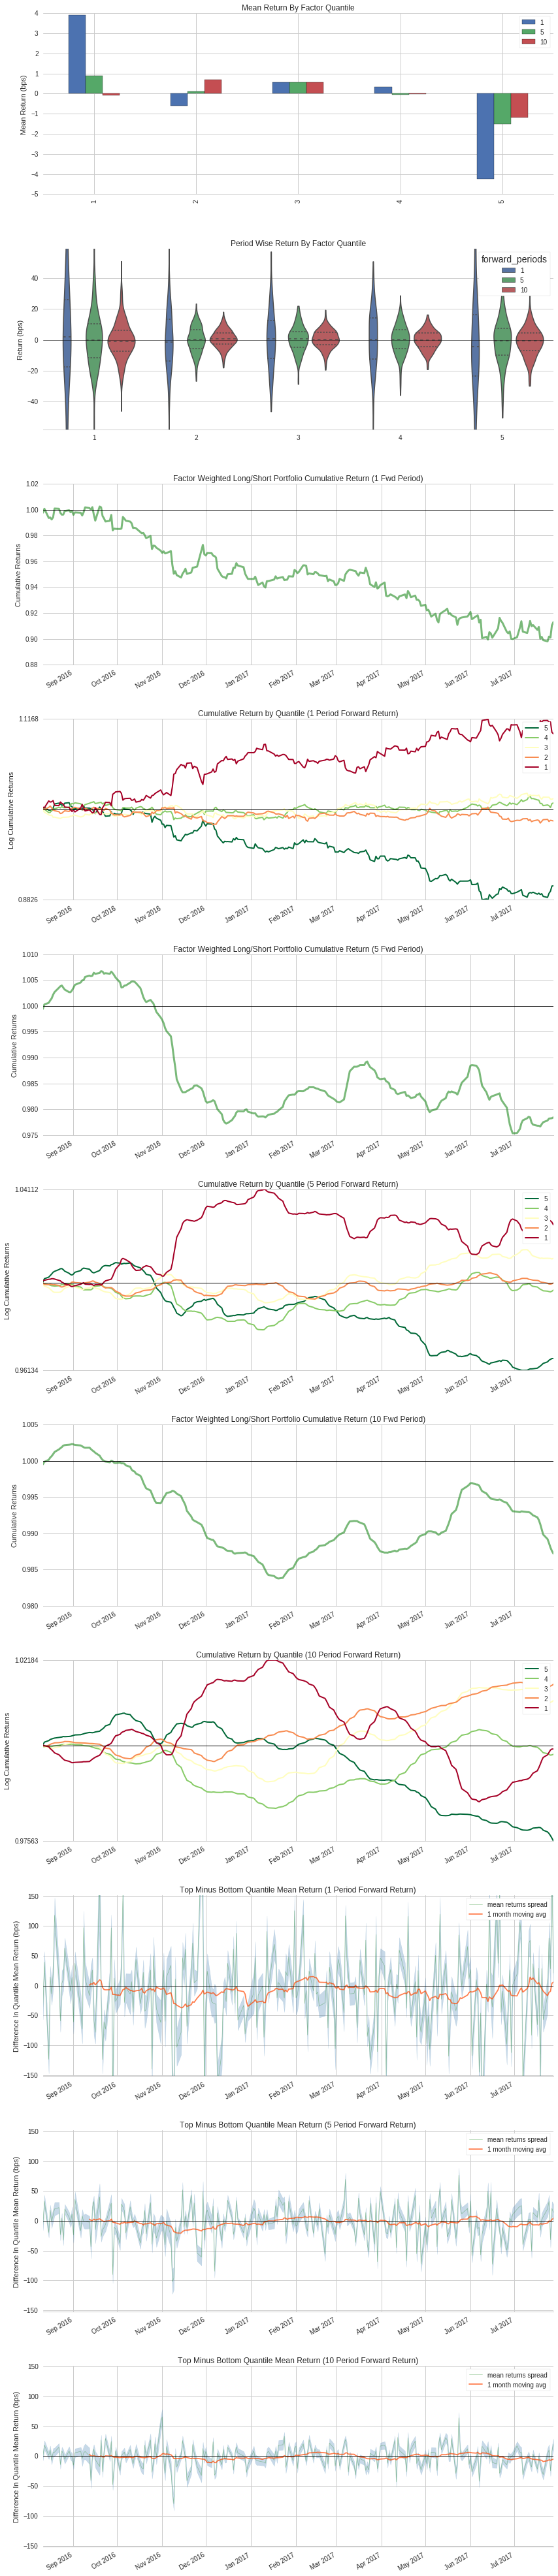

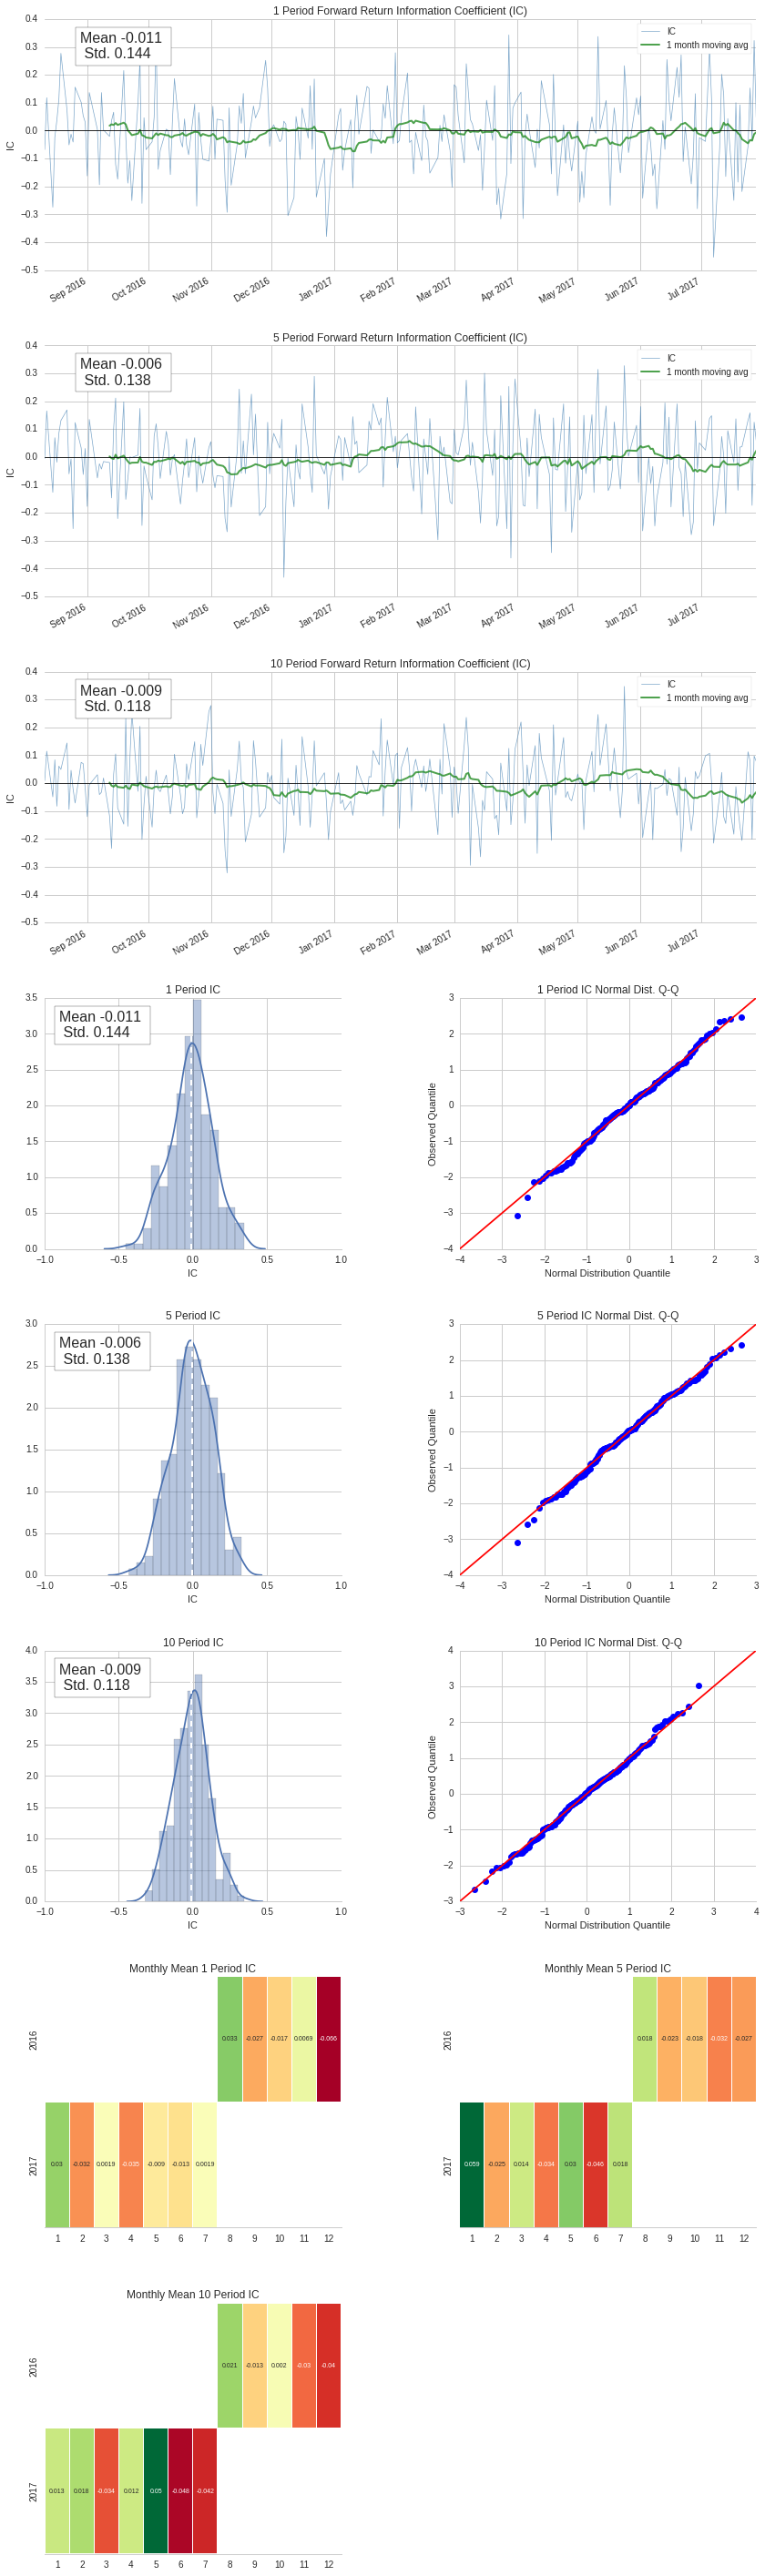

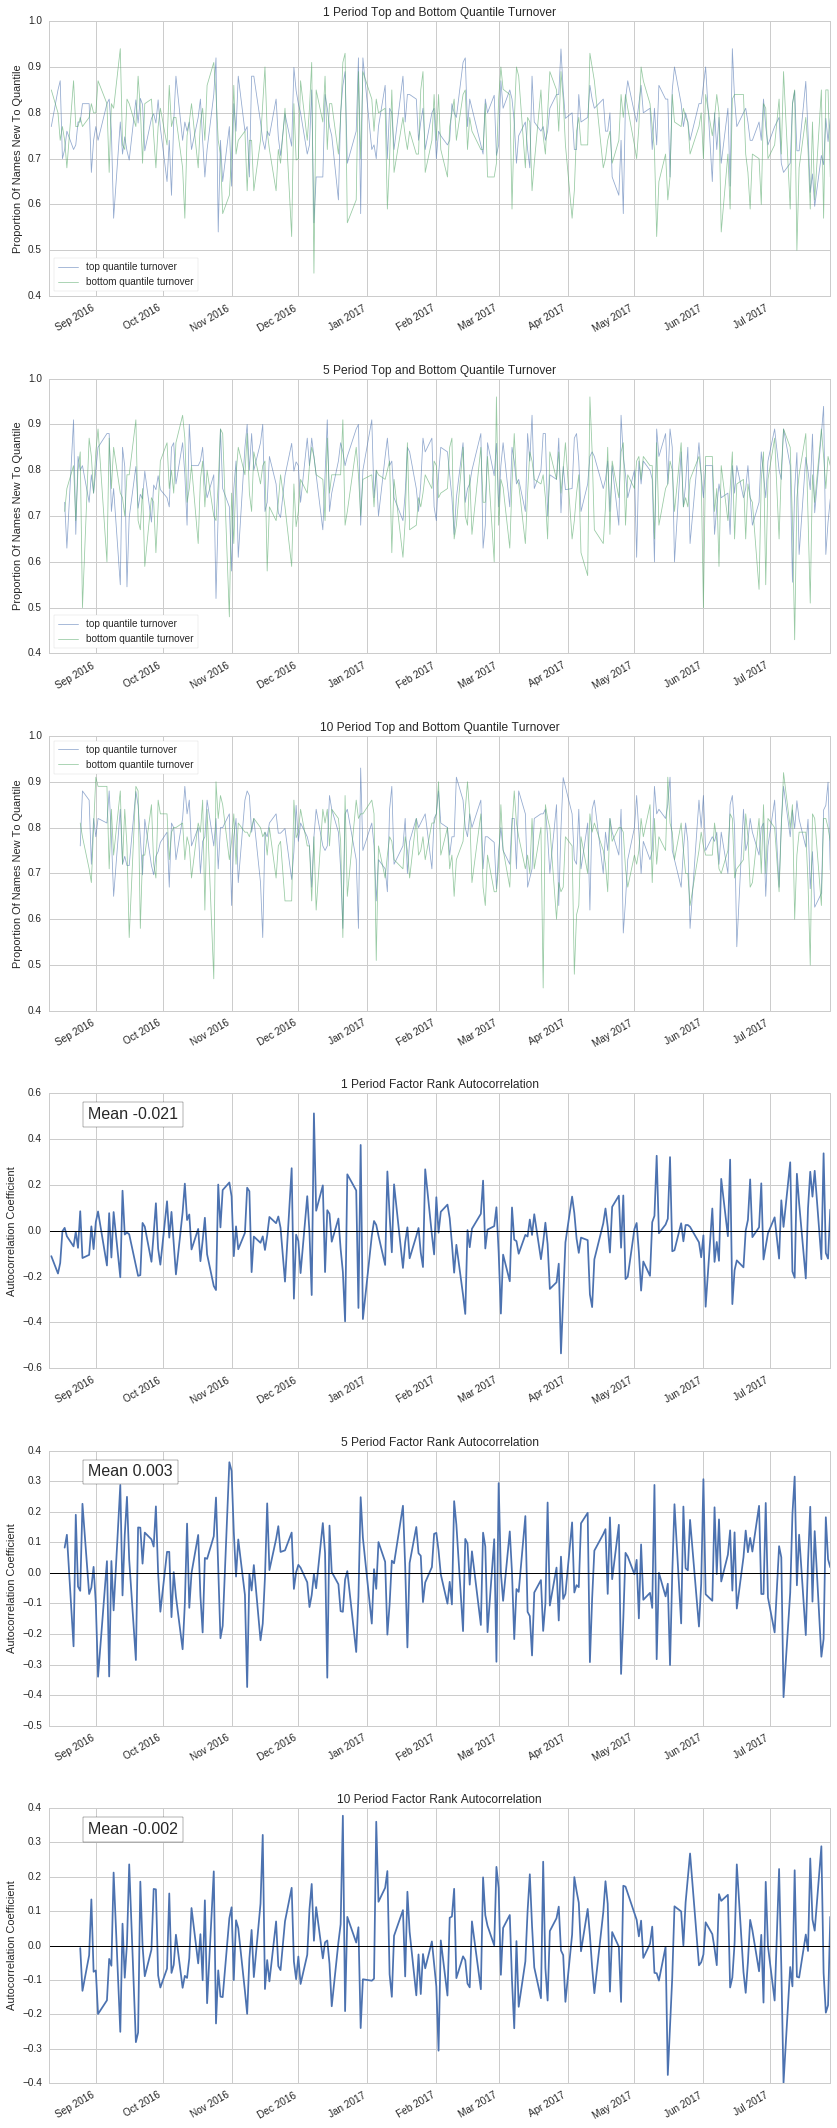

In [30]:
# Ingest and format data.
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(alphas['PriceReversal'],
                                                                   pricing,
                                                                   quantiles=5,
                                                                   groupby=alphas['Sector'],
                                                                   periods=(1,5,10))

alphalens.tears.create_full_tear_sheet(factor_data)

## Import data:

In [31]:
import quantopian.pipeline.data.morningstar as mstar

## Define the Accelerating Sales factor:

In [38]:
class AcceleratingSales(CustomFactor):  
    inputs = [mstar.income_statement.total_revenue]
    window_length = 252
    
    def compute(self, today, assets, out, sales):  
        out[:] = (sales[0]-sales[-251]) / sales[-251]

## Create the Accelerating Sales Pipeline:

In [39]:
pipe_acc_sales = Pipeline(
    columns={
        'AcceleratingSales': AcceleratingSales(mask=universe),
        'Sector': Sector(mask=universe),
    },
    screen=universe
)

## Run the Accelerating Sales Pipeline:

In [40]:
results = run_pipeline(pipe_acc_sales, start_date=start, end_date=end)

In [41]:
stocks = results.index.levels[1].unique()  
prices = get_pricing(stocks, start, end, fields='open_price') 

In [44]:
# Ingest and format data.
data = alphalens.utils.get_clean_factor_and_forward_returns(results['AcceleratingSales'],
                                                                   prices,
                                                                   quantiles=5,
                                                                   groupby=results['Sector'],
                                                                   periods=(1,5,10))

alphalens.tears.create_full_tear_sheet(data)

ValueError: Bin edges must be unique: array([-0.12350743,  0.        ,  0.        ,  0.        ,  0.        ,
        0.5881201 ])